#Lab 5: Simulation

##Simulating Coin Tosses

##### Let's start by building a coin flip simulator!

##### We'll define a function that is a "coin flipper", taking the argument:
>##### heads_prob: the probability of heads
##### and returns:
>##### 1 if heads, 0 if tails

In [ ]:
## import bernoulli class from scipy.stats library
from scipy.stats import bernoulli

## define function
def coin_flipper(heads_prob):

  heads = bernoulli.rvs(p=heads_prob, size=1)

  return heads[0] ## adding the [0] pulls the value out of the array

### Discussion Question 1
####Run a few trials of *coin_flipper*.  Are you seeing what you expect?

In [ ]:
import numpy as np
np.random.seed(2121)
pro = 0.9


 #### How can you confirm with a simulation?

In [ ]:
re = [coin_flipper(pro) for n in range(1, 1000)]
sum(re)/len(re)

0.8898898898898899

### Discussion Question 2

#### Before moving on to the next exercise, can anyone remember the difference between a binomial and a bernoulli distribution?

### Exercise 1

##### Now define two "heads_counter" functions that take arguments:
>##### heads_prob, the probability of heads
>##### n_flips, the number of flips
##### and each return:
>##### k, the number of heads

##### Make one function using your *coin_flipper* function from above and the other function using a *binomial random value generator*.

##### Check out the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to see how you can generate realizations from a binomial distribution.  This site also gives a complete list of available distributions in the stats module.

##### Compare the outputs of your two functions for a 50 flips with a probability of heads equal to 0.5.

In [ ]:
### Define heads_counter1 using coin_flipper which relies on
### on the bernoulli random variable generator.

def heads_counter1(pro, n):
  count = 0
  for i in range(n):
    count += coin_flipper(pro)
  return count



In [ ]:
### Define heads_counter2 using binomial random variable generator.
from scipy.stats import binom
def heads_counter2(pro, n):
  count = 0
  count += binom.rvs(n=n,p=pro,size=1)
  return count[0]



In [ ]:
### Compare output from each function
print(heads_counter1(0.5,100))
print(heads_counter2(0.5,100))

44
50


#### Suppose we want to test if the two *heads_counter* functions output systematically different counts.

### Discussion Question 3: How should we go about doing this?

#### Let's go through it together. First, define a function *heads_diff* which draw samples from each of these heads_counter functions and compares them, taking as arguments:
>##### rs, the number of times to sample from each function
>##### n, the number of flips
>##### p, the probability of heads

##### and returns:
>##### a list output from *heads_counter1*
>##### a list output from *heads_counter2*

In [ ]:
resample_size = 1000
n_flips = 50
heads_p = 0.5

def heads_diff(rs, n, p):

  hc1 = [heads_counter1(p, n) for i in range(rs)]
  hc2 = [heads_counter2(p, n) for i in range(rs)]

  return hc1, hc2

h1,h2 = heads_diff(rs=resample_size,n=n_flips,p=heads_p)

####Next, plot your data and test your hypothesis

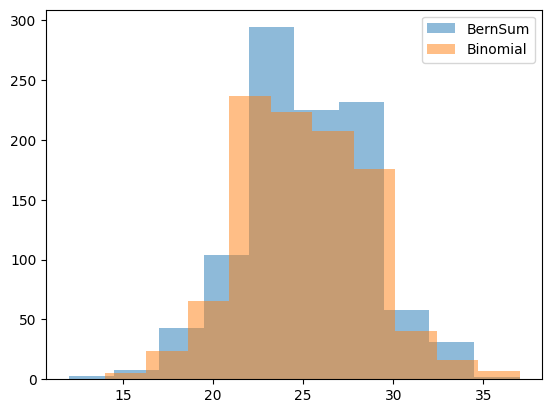

In [ ]:
### plot
import matplotlib.pyplot as plt

plt.hist(h1, alpha=0.5, label="BernSum")
plt.hist(h2, alpha=0.5, label="Binomial")
plt.legend(loc='upper right')
plt.show()

In [ ]:
## Non-parametric, Wilcoxon test

from scipy.stats import wilcoxon

wilcoxon(h1,h2)


WilcoxonResult(statistic=205226.0, pvalue=0.29674236204939897)

In [ ]:
## parametric independent samples t-test

from scipy.stats import ttest_ind

ttest_ind(h1,h2)

TtestResult(statistic=-1.1728901734083375, pvalue=0.2409796633798568, df=1998.0)

##Law of large numbers

#### The (Strong) Law of Large Numbers (LLN) states that the empirical average gets closer and closer to the population average as the sample size increases.


#### Let's keep using our functions from above, but consider the case in which we are taking more and more samples.

## Discussion Question 4: What do we expect to happen to the mean and variance of our data as we collect more samples?

####Choose one of the *head_counter* functions and simulate 10, 100, 1000, and 10000 samples when we make 100 coin flips with probability of flipping heads=0.5

In [ ]:
## sample data
s10 = [heads_counter2(0.5, 100) for i in range(10)]
s50 = [heads_counter2(0.5, 100) for i in range(100)]
s100 = [heads_counter2(0.5, 100) for i in range(1000)]
s1000 = [heads_counter2(0.5, 100) for i in range(10000)]

#### Let's compute the population mean and variance as well as the empirical/sample mean and variance for each sample and plot the distribution.

In [ ]:
## population mean = n*p ; population var = np(1-p)

print("Population mean: " + str(.5*100))

print("Population var: "  + str(0.5*0.5*100))


Population mean: 50.0
Population var: 25.0


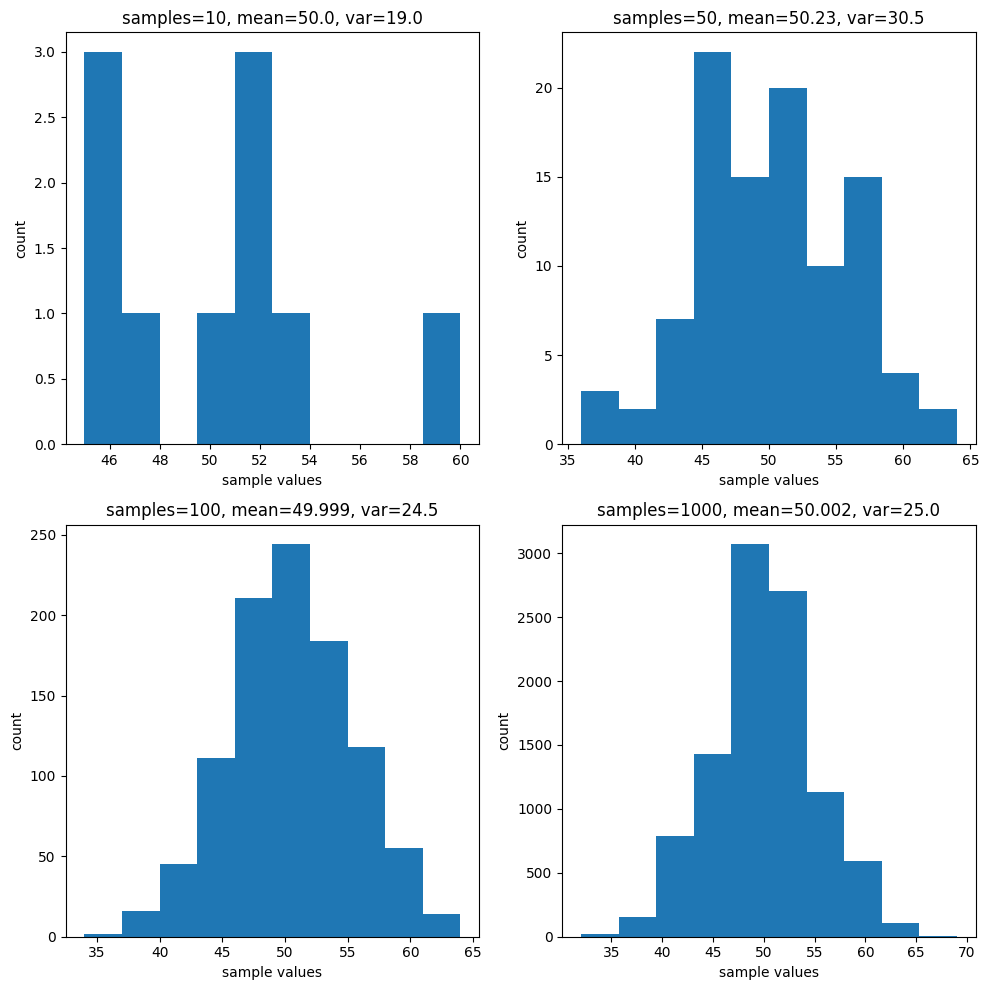

In [ ]:
## plot distributions
import numpy as np
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].hist(s10)
axs[0, 0].set_title('samples=10, mean='+str(np.mean(s10))+', var='+str(np.round(np.var(s10),decimals=1)))
axs[0, 1].hist(s50)
axs[0, 1].set_title('samples=50, mean='+str(np.mean(s50))+', var='+str(np.round(np.var(s50),decimals=1)))
axs[1, 0].hist(s100)
axs[1, 0].set_title('samples=100, mean='+str(np.mean(s100))+', var='+str(np.round(np.var(s100),decimals=1)))
axs[1, 1].hist(s1000)
axs[1, 1].set_title('samples=1000, mean='+str(np.mean(s1000))+', var='+str(np.round(np.var(s1000),decimals=1)))

for ax in axs.flat:
    ax.set(xlabel='sample values', ylabel='count')

fig.tight_layout()

### Discussion Question 5: Are we seeing what we expect here? Is the behavior consistent with the LLN?

## Investigating the behavior of the empirical/sample mean

#### Next, let's consider simulating from the distribution this *estimator*.

#### Specifically, we'll consider estimating the population mean $\mu$ with $\bar{X}$ based on a random sample from a binomial distribution.  

#### It can be shown that for random sample of size $n$ from a distribution with standard deviation $\sigma$, the standard error (SE) of $\bar{X}$ is

>#### $SE[\bar{X}] = \frac{\sigma}{\sqrt{n}} $

#### This formula is true not only for binomial random variables, but for any random variables from a distribution with finite variance.

#### Let's use simulation to confirm this formula in the binomial case.

### Exercise 2

####First, define a function called *sample_estimate* which takes the arguments

>##### n_draws, sample size
>##### n_flips, n parameter for the binomial distribution (the number of flips)
>##### p_heads, the probability of the coin landing on heads

#### and returns
>##### the mean from the n_draws

Run your function for 1000 datasets containing a sequence of 10 flips with an underlying probability of heads of 1/2.

In [ ]:
### sample_estimate function:


### Exercise 3

####Next define a function *estimator_sampler* that samples over these sample estimates, taking the same arguments plus n_samples, the number of sample estimates to compute and returns:
>##### a tuple: mean, standard error

#### Use your function to obtain mean and standard error estimates from 1000 simulated datasets containing 10 sequences of 10 flips with an underlying probability of heads of 1/2.

####Compare the output containing your estimates to the population mean and the standard error formula stated above.

In [ ]:
### estimator_sampler function


In [ ]:
### use your function and compare



## Investigating the behavior of the sample median

### Exercise 4

#### Now let's consider the sample median.

#### Create a *median_estimate* function and a sampler function like you did in the previous exercise for the mean.

#### Use your function to obtain median estimates from 1000 simulated datasets containing 10 sequences of 10 flips with an underlying probability of heads of 1/2.

#### Plot the distribution of your estimates.


In [ ]:
### defining median_estimate function


### defining median sampler


In [ ]:
###  plot the estimates

## The Central Limit Theorem (CLT)

###Take 1: Resampling from an arbitrary population

#####The first take on the CLT we will take is sampling from a population.

##### Consider an iid sample of size $n$ from a distribution with mean $\mu$ and variance $\sigma^2$. The CLT states that the distribution of $\bar{X}$ is approximately (ie. when $n$ is large) as the sample  normal with mean $\mu$ and variance $\sigma/n$.

## Discussion Question 6: Have we already seen the CLT in this lab?

####Let's create an arbitrary distribution sampler by mixing different distributions

In [ ]:
#### definining my_dist_sampler:
def my_dist():
  x = np.random.beta(3,10) + np.random.poisson(2) + np.random.binomial(10,0.2)
  return x

def my_dist_sampler(n):
  my_sample = [my_dist() for i in range(n)]
  return my_sample

#### Plot the distribution of a sample from your arbitrary distribution

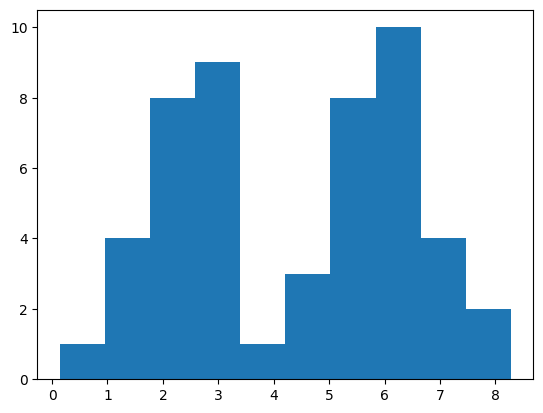

In [ ]:
plt.hist(my_dist_sampler(50))
plt.show()


#### Now create a means sampler for this distribution and plot the distribution of means over 1000 samples of size 50

#### Plot the distribution of the means and compare the theoretical and numerical confidence intervals.

In [ ]:
def mean_dist(n,n_rs):
  means = [np.mean(my_dist_sampler(n=n)) for i in range(n_rs)]
  return means, np.mean(means), np.std(means)


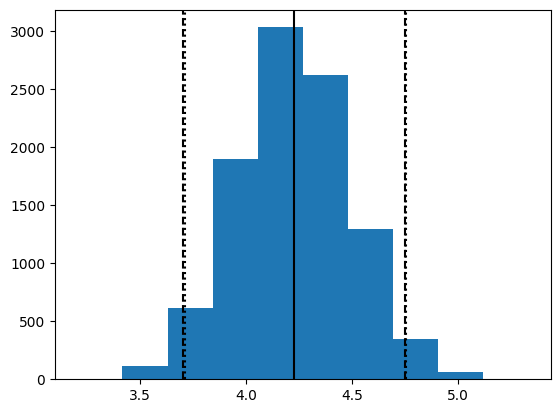

In [ ]:
my_means, rs_mean, rs_sd = mean_dist(n=50, n_rs=10000)

num_lcl = np.quantile(my_means, 0.025)
num_ucl = np.quantile(my_means, 0.975)

plt.hist(my_means)
plt.axvline(rs_mean, color = 'k')
plt.axvline(rs_mean - 1.96*rs_sd, color = 'k', linestyle="dashed")
plt.axvline(rs_mean + 1.96*rs_sd, color = 'k', linestyle="dashed")
plt.axvline(num_lcl, color = 'k', linestyle="dotted")
plt.axvline(num_ucl, color = 'k', linestyle="dotted")

### Discussion Question 7: Does the CLT appear to be holding up in this example?

### Another application of the CLT: The normal approximation of the binomial

#### Now lets consider another application of the central limit theorem: the normal approximation for the binomial distribution.


#### A general rule of thumb for the normal approximation of the binomial to hold is   $n*p > 5$ where $n$ is the number of trials and $p$ is the probability of success.

## ## Discussion Question 8 : Why does the Binomial grow more "normal" as n gets larger (assume p is fixed)?



#### So, for our fair coin scenario, let's keep the number of samples at 1000 but make our parameters for the binomial p=0.5 and vary n.

In [ ]:
## sample data
d1 = [heads_counter2(0.5, 1) for i in range(1000)]
d3 = [heads_counter2(0.5, 3) for i in range(1000)]
d5 = [heads_counter2(0.5, 5) for i in range(1000)]
d10 = [heads_counter2(0.5, 10) for i in range(1000)]
d50 = [heads_counter2(0.5, 50) for i in range(1000)]
d100 = [heads_counter2(0.5, 100) for i in range(1000)]
d500 = [heads_counter2(0.5, 500) for i in range(1000)]
d1000 = [heads_counter2(0.5, 1000) for i in range(1000)]

####Next, plot the distribution of your sample values. Do they appear to grow more Gaussian?



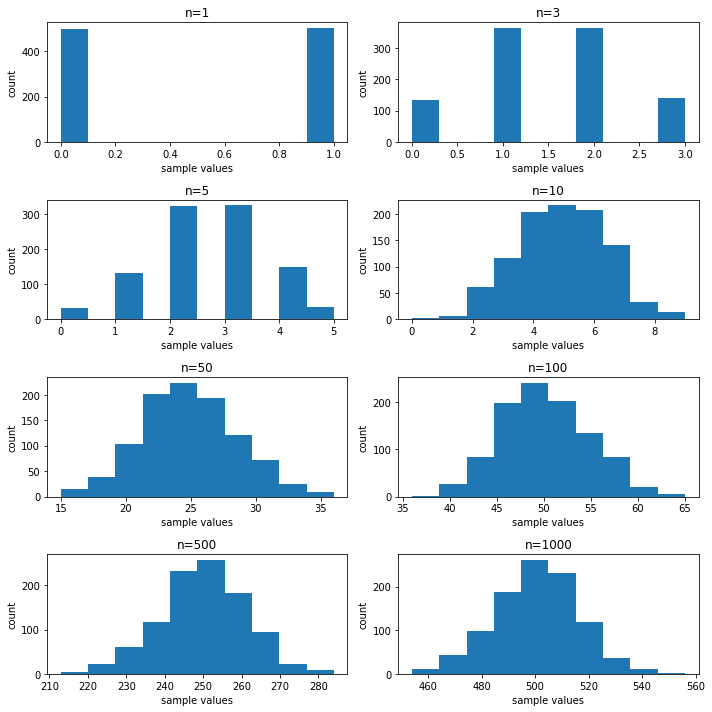

In [ ]:
## plot distributions

fig, axs = plt.subplots(4, 2, figsize=(10,10))
axs[0, 0].hist(d1)
axs[0, 0].set_title('n=1')
axs[0, 1].hist(d3)
axs[0, 1].set_title('n=3')
axs[1, 0].hist(d5)
axs[1, 0].set_title('n=5')
axs[1, 1].hist(d10)
axs[1, 1].set_title('n=10')
axs[2, 0].hist(d50)
axs[2, 0].set_title('n=50')
axs[2, 1].hist(d100)
axs[2, 1].set_title('n=100')
axs[3, 0].hist(d500)
axs[3, 0].set_title('n=500')
axs[3, 1].hist(d1000)
axs[3, 1].set_title('n=1000')

for ax in axs.flat:
    ax.set(xlabel='sample values', ylabel='count')

fig.tight_layout()

plt.show()